In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
# This is a compiled datasets comprising of data from various companies' 10-K annual reports and balance sheets.
# The data is a longitudinal or panel data, from year 2009-2022(/23) and also consists 
# of a few bankrupt companies to help for investigating factors.
# The names of the companies are given according to their Stocks.
# Companies divided into specific categories.

# Data Collection

In [3]:
# Financial Statements.csv from kaggle

# Reading The Data

In [4]:
data = pd.read_csv('FinancialStatements.csv')

In [5]:
data = pd.read_csv('FinancialStatements.csv')

In [6]:
data

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.1100,130541.0,50672.0,...,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.6100,120233.0,63090.0,...,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979
2,2020,AAPL,IT,2255.97,274515.0,104956.0,57411.0,3.2800,77344.0,65339.0,...,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336
3,2019,AAPL,IT,1304.76,260174.0,98392.0,55256.0,2.9700,76477.0,90488.0,...,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122
4,2018,AAPL,IT,748.54,265595.0,101839.0,59531.0,2.9800,81801.0,107147.0,...,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2013,AMZN,LOGI,182.54,74452.0,20271.0,274.0,0.0295,3998.0,9746.0,...,1.0716,0.3274,2.8114,0.6823,2.1180,0.3680,0.1748,3.8641,117300,1.4648
157,2012,AMZN,LOGI,113.63,61093.0,15122.0,-39.0,-0.0045,2835.0,8192.0,...,1.1207,0.3765,-0.4761,-0.1198,-0.3459,-0.0638,-0.1833,-0.6915,88400,2.0693
158,2011,AMZN,LOGI,78.72,48077.0,10789.0,631.0,0.0685,1945.0,7757.0,...,1.1741,0.0329,8.1346,2.4962,7.8757,1.3125,-0.0490,10.8756,56200,3.1568
159,2010,AMZN,LOGI,80.79,34204.0,7643.0,1152.0,0.1265,1974.0,6864.0,...,1.3254,0.2274,16.7832,6.1286,13.6736,3.3680,-0.0544,20.8885,33700,1.6400


In [7]:
data.shape

(161, 23)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 161 non-null    int64  
 1   Company                              161 non-null    object 
 2   Category                             161 non-null    object 
 3   Market Cap(in B USD)                 160 non-null    float64
 4   Revenue                              161 non-null    float64
 5   Gross Profit                         161 non-null    float64
 6   Net Income                           161 non-null    float64
 7   Earning Per Share                    161 non-null    float64
 8   EBITDA                               161 non-null    float64
 9   Share Holder Equity                  161 non-null    float64
 10  Cash Flow from Operating             161 non-null    float64
 11  Cash Flow from Investing        

In [9]:
# The dataset comprises of 161 rows and 23 columns. 2 of the 23 columns are object datatypes. 2 columns are integer.
# While 19 columns are floats datatypte.The information in the dataset also shows that there are no missing values. 
# And the memory usage is 322.8+ KB.

# Data Cleaning and Preparation

In [10]:
data.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,...,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,...,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979
2,2020,AAPL,IT,2255.97,274515.0,104956.0,57411.0,3.28,77344.0,65339.0,...,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336
3,2019,AAPL,IT,1304.76,260174.0,98392.0,55256.0,2.97,76477.0,90488.0,...,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122
4,2018,AAPL,IT,748.54,265595.0,101839.0,59531.0,2.98,81801.0,107147.0,...,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426


In [11]:
data.duplicated().any()

False

# Analysis

In [12]:
data['Category'].unique().tolist()

['IT',
 'FinTech',
 'Bank',
 'Manufacturing',
 'Finance',
 'FOOD',
 'BANK',
 'ELEC',
 'LOGI']

In [13]:
print("Total Number of unique values in the Company Column : {}" . format(len(data['Category'].unique().tolist())))

Total Number of unique values in the Company Column : 9


In [14]:
data['Category'].value_counts()

IT               43
ELEC             29
Bank             14
Manufacturing    14
FOOD             14
BANK             14
LOGI             14
Finance          10
FinTech           9
Name: Category, dtype: int64

In [15]:
data['Company '].unique().tolist()

['AAPL',
 'MSFT',
 'GOOG',
 'PYPL',
 'AIG',
 'PCG',
 'SHLDQ',
 'MCD',
 'BCS',
 'NVDA',
 'INTC',
 'AMZN']

In [16]:
print("Total Number of unique values in the Company Column : {}" . format(len(data['Company '].unique().tolist())))

Total Number of unique values in the Company Column : 12


In [17]:
data['Company '].value_counts()

MSFT     15
NVDA     15
AAPL     14
GOOG     14
AIG      14
PCG      14
MCD      14
BCS      14
INTC     14
AMZN     14
SHLDQ    10
PYPL      9
Name: Company , dtype: int64

In [18]:
data[data['Company ']=='MSFT']['Category'].value_counts()

IT    15
Name: Category, dtype: int64

In [19]:
data[data['Company ']=='NVDA']['Category'].value_counts()

ELEC    15
Name: Category, dtype: int64

In [20]:
data[data['Company ']=='AAPL']['Category'].value_counts()

IT    14
Name: Category, dtype: int64

In [21]:
data[data['Company ']=='GOOG']['Category'].value_counts()

IT    14
Name: Category, dtype: int64

In [22]:
data[data['Company ']=='AIG']['Category'].value_counts()

Bank    14
Name: Category, dtype: int64

In [23]:
data[data['Company ']=='PCG']['Category'].value_counts()

Manufacturing    14
Name: Category, dtype: int64

In [24]:
data[data['Company ']=='MCD']['Category'].value_counts()

FOOD    14
Name: Category, dtype: int64

In [25]:
data[data['Company ']=='BCS']['Category'].value_counts()

BANK    14
Name: Category, dtype: int64

In [26]:
data[data['Company ']=='INTC']['Category'].value_counts()

ELEC    14
Name: Category, dtype: int64

In [27]:
data[data['Company ']=='AMZN']['Category'].value_counts()

LOGI    14
Name: Category, dtype: int64

In [28]:
data[data['Company ']=='SHLDQ']['Category'].value_counts()

Finance    10
Name: Category, dtype: int64

In [29]:
data[data['Company ']=='PYPL']['Category'].value_counts()

FinTech    9
Name: Category, dtype: int64

In [30]:
MSFT = data[data['Company '] == 'MSFT']

In [31]:
MSFT.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
14,2023,MSFT,IT,2451.23,211915.0,146052.0,72361.0,9.68,102384.0,206223.0,...,1.7692,0.2291,35.0887,17.5644,29.1528,34.1462,-0.6808,56.1064,221000,3.7000
15,2022,MSFT,IT,1787.73,198270.0,135620.0,72738.0,9.65,97843.0,166542.0,...,1.7846,0.2989,43.6755,19.9370,34.0575,36.6863,1.2643,82.9207,221000,8.0028
16,2021,MSFT,IT,2525.08,168088.0,115856.0,61271.0,8.05,81602.0,141988.0,...,2.0800,0.4095,43.1522,18.3568,31.9017,36.4517,1.4887,72.5298,181000,4.6979
17,2020,MSFT,IT,1681.61,143015.0,96937.0,44281.0,5.76,65755.0,118304.0,...,2.5158,0.5353,37.4298,14.6961,24.8935,30.9625,0.9526,65.2006,163000,1.2336
18,2019,MSFT,IT,1203.06,125843.0,82933.0,39240.0,5.06,54641.0,102330.0,...,2.5288,0.7053,38.3465,13.6937,23.2200,31.1817,0.7968,74.6661,144000,1.8122


In [32]:
msft = MSFT.drop(['Company ', 'Category', 'Gross Profit', 'Earning Per Share', 'EBITDA', 'Current Ratio',
           'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin', 'Free Cash Flow per Share',
           'Return on Tangible Equity', 'Inflation Rate(in US)', 'Cash Flow from Operating', 
           'Cash Flow from Investing', 'Cash Flow from Financial Activities'], axis = 1)

In [33]:
msft

,Year,Market Cap(in B USD),Revenue,Net Income,Share Holder Equity,Number of Employees
14,2023,2451.23,211915.0,72361.0,206223.0,221000
15,2022,1787.73,198270.0,72738.0,166542.0,221000
16,2021,2525.08,168088.0,61271.0,141988.0,181000
17,2020,1681.61,143015.0,44281.0,118304.0,163000
18,2019,1203.06,125843.0,39240.0,102330.0,144000
19,2018,779.67,110360.0,16571.0,82718.0,131000
20,2017,659.91,96571.0,25489.0,87711.0,124000
21,2016,483.16,91154.0,20539.0,71997.0,114000
22,2015,443.17,93580.0,12193.0,80083.0,118000
23,2014,382.88,86833.0,22074.0,89784.0,128000


In [34]:
ms = pd.melt(msft, id_vars = 'Year', value_vars = ['Market Cap(in B USD)', 'Revenue', 'Net Income', 'Share Holder Equity', 
                                                   'Number of Employees'], value_name = 'values')

In [35]:
ms

,Year,variable,values
0,2023,Market Cap(in B USD),2451.23
1,2022,Market Cap(in B USD),1787.73
2,2021,Market Cap(in B USD),2525.08
3,2020,Market Cap(in B USD),1681.61
4,2019,Market Cap(in B USD),1203.06
...,...,...,...
70,2013,Number of Employees,118000.00
71,2012,Number of Employees,128000.00
72,2011,Number of Employees,99000.00
73,2010,Number of Employees,94000.00


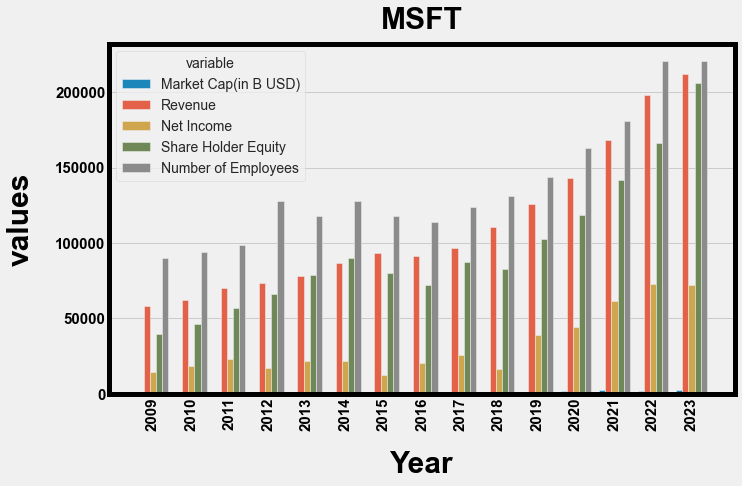

In [36]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x = 'Year', y = 'values', hue = 'variable', data = ms)
plt.xlabel('Year', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.ylabel('values', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('MSFT', fontweight = 'bold', fontsize = 30, color = 'black', pad = 15)
plt.savefig('MSFT.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [37]:
# MSFT has been growing from 2009-2023. The factors responsible for this were Revenue generated, 
# increase in Number of Employees and Share Holder Equity.

In [38]:
NVDA = data[data['Company '] == 'NVDA']

In [39]:
NVDA.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
118,2023,NVDA,ELEC,1000.35,26974.0,15356.0,4368.0,1.7400,5768.0,22101.0,...,3.5156,0.4956,19.7638,10.6066,13.7341,16.1934,-1.6890,27.2099,26196,3.7000
119,2022,NVDA,ELEC,359.50,26914.0,17475.0,9752.0,3.8500,11215.0,26612.0,...,6.6503,0.4113,36.6451,22.0698,25.9652,36.2339,1.3378,48.9460,22473,8.0028
120,2021,NVDA,ELEC,735.86,16675.0,10396.0,4332.0,1.7300,5630.0,16893.0,...,4.0904,0.4122,25.6438,15.0464,18.9526,25.9790,0.1419,43.4809,18975,4.6979
121,2020,NVDA,ELEC,323.24,10918.0,6768.0,2796.0,1.1300,3227.0,12204.0,...,7.6738,0.1631,22.9105,16.1479,19.6971,25.6091,0.4710,24.2351,13775,1.2336
122,2019,NVDA,ELEC,144.00,11716.0,7171.0,4141.0,1.6575,4066.0,9342.0,...,7.9436,0.2128,44.3267,31.1541,36.5490,35.3448,0.1057,47.7129,13277,1.8122


In [40]:
nvda = NVDA.drop(['Company ', 'Category', 'Gross Profit', 'Earning Per Share', 'EBITDA', 'Current Ratio',
           'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin', 'Free Cash Flow per Share',
           'Return on Tangible Equity', 'Inflation Rate(in US)', 'Cash Flow from Operating', 
           'Cash Flow from Investing', 'Cash Flow from Financial Activities'], axis = 1)

In [41]:
nvda

,Year,Market Cap(in B USD),Revenue,Net Income,Share Holder Equity,Number of Employees
118,2023,1000.35,26974.000,4368.000,22101.000,26196
119,2022,359.50,26914.000,9752.000,26612.000,22473
120,2021,735.86,16675.000,4332.000,16893.000,18975
121,2020,323.24,10918.000,2796.000,12204.000,13775
122,2019,144.00,11716.000,4141.000,9342.000,13277
123,2018,81.44,9714.000,3047.000,7471.000,11528
124,2017,117.26,6910.000,1666.000,5762.000,10299
125,2016,57.53,5010.000,614.000,4469.000,9227
126,2015,17.73,4682.000,631.000,4418.000,9228
127,2014,10.90,4130.000,440.000,4456.398,8808


In [42]:
nv = pd.melt(nvda, id_vars = 'Year', value_vars = ['Market Cap(in B USD)', 'Revenue', 'Net Income', 'Share Holder Equity', 
                                                   'Number of Employees'], value_name = 'values')

In [43]:
nv

,Year,variable,values
0,2023,Market Cap(in B USD),1000.35
1,2022,Market Cap(in B USD),359.50
2,2021,Market Cap(in B USD),735.86
3,2020,Market Cap(in B USD),323.24
4,2019,Market Cap(in B USD),144.00
...,...,...,...
70,2013,Number of Employees,7974.00
71,2012,Number of Employees,7133.00
72,2011,Number of Employees,6029.00
73,2010,Number of Employees,5706.00


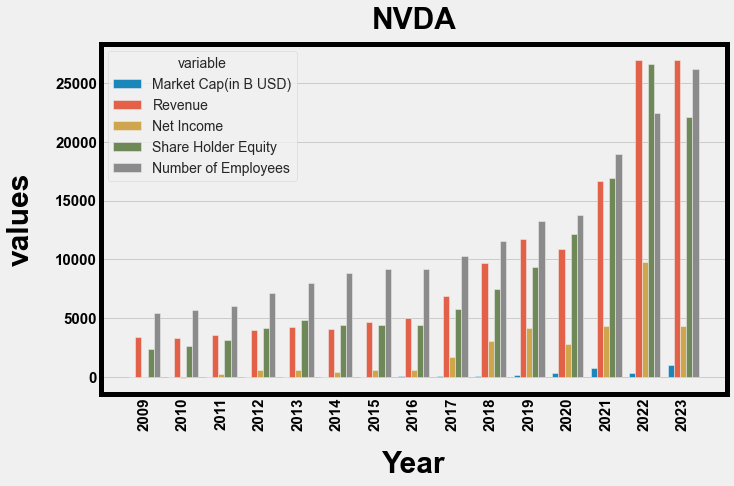

In [44]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x = 'Year', y = 'values', hue = 'variable', data = nv)
plt.xlabel('Year', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.ylabel('values', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('NVDA', fontweight = 'bold', fontsize = 30, color = 'black', pad = 15)
plt.savefig('NVDA.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [45]:
# NVDA was the most successful of all the companies. It has been growing since 2009-2023.
# The factors responsible for this were Market Capitalization, Revenue generated, Number of Employees
# Share Holder Equity.

In [46]:
AAPL = data[data['Company '] == 'AAPL']

In [47]:
AAPL.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,...,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,...,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979
2,2020,AAPL,IT,2255.97,274515.0,104956.0,57411.0,3.28,77344.0,65339.0,...,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336
3,2019,AAPL,IT,1304.76,260174.0,98392.0,55256.0,2.97,76477.0,90488.0,...,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122
4,2018,AAPL,IT,748.54,265595.0,101839.0,59531.0,2.98,81801.0,107147.0,...,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426


In [48]:
aapl = AAPL.drop(['Company ', 'Category', 'Gross Profit', 'Earning Per Share', 'EBITDA', 'Current Ratio',
           'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin', 'Free Cash Flow per Share',
           'Return on Tangible Equity', 'Inflation Rate(in US)', 'Cash Flow from Operating', 
           'Cash Flow from Investing', 'Cash Flow from Financial Activities'], axis = 1)

In [49]:
aapl

,Year,Market Cap(in B USD),Revenue,Net Income,Share Holder Equity,Number of Employees
0,2022,2066.94,394328.0,99803.0,50672.0,164000
1,2021,2913.28,365817.0,94680.0,63090.0,154000
2,2020,2255.97,274515.0,57411.0,65339.0,147000
3,2019,1304.76,260174.0,55256.0,90488.0,137000
4,2018,748.54,265595.0,59531.0,107147.0,132000
5,2017,868.87,229234.0,48351.0,134047.0,123000
6,2016,617.59,215639.0,45687.0,128249.0,116000
7,2015,586.86,233715.0,53394.0,119355.0,110000
8,2014,647.36,182795.0,39510.0,111547.0,97000
9,2013,504.79,170910.0,37037.0,123549.0,84400


In [50]:
ap = pd.melt(aapl, id_vars = 'Year', value_vars = ['Market Cap(in B USD)', 'Revenue', 'Net Income', 'Share Holder Equity', 
                                                   'Number of Employees'], value_name = 'values')

In [51]:
ap

,Year,variable,values
0,2022,Market Cap(in B USD),2066.94
1,2021,Market Cap(in B USD),2913.28
2,2020,Market Cap(in B USD),2255.97
3,2019,Market Cap(in B USD),1304.76
4,2018,Market Cap(in B USD),748.54
...,...,...,...
65,2013,Number of Employees,84400.00
66,2012,Number of Employees,76100.00
67,2011,Number of Employees,63300.00
68,2010,Number of Employees,49400.00


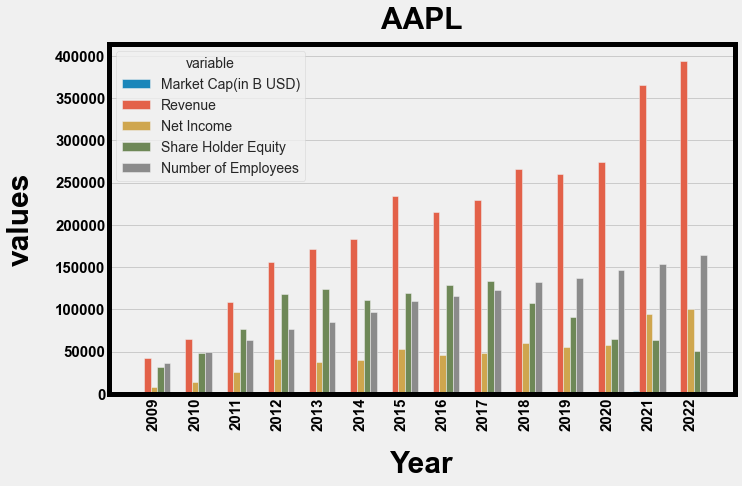

In [52]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x = 'Year', y = 'values', hue = 'variable', data = ap)
plt.xlabel('Year', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.ylabel('values', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('AAPL', fontweight = 'bold', fontsize = 30, color = 'black', pad = 15)
plt.savefig('AAPL.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [53]:
# AAPL also has been growing since 2009-2022. The factors responsible for this were Revenue generated
# and increase in Number of Employees.

In [54]:
GOOG = data[data['Company '] == 'GOOG']

In [55]:
GOOG.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
29,2022,GOOG,IT,1144.35,282836.0,156633.0,59972.0,4.560,90770.0,256144.0,...,2.3780,0.0574,23.4134,16.4188,22.1426,21.2038,-0.3613,26.6424,190234,8.0028
30,2021,GOOG,IT,1910.26,257637.0,146698.0,76033.0,5.610,91155.0,251635.0,...,2.9281,0.0589,30.2156,21.1633,28.5354,29.5117,1.7123,33.4561,156500,4.6979
31,2020,GOOG,IT,1179.40,182527.0,97795.0,40269.0,2.930,54921.0,222544.0,...,3.0668,0.0626,18.0949,12.5992,17.0288,22.0619,0.8430,20.1422,135301,1.2336
32,2019,GOOG,IT,917.82,161857.0,89961.0,34343.0,2.458,46012.0,201442.0,...,3.3741,0.0226,17.0486,12.4472,16.6717,21.2181,0.5566,19.2033,118899,1.8122
33,2018,GOOG,IT,719.63,136819.0,77270.0,30736.0,2.185,36559.0,177628.0,...,3.9190,0.0226,17.3036,13.2032,16.9214,22.4647,-0.0705,19.5124,98771,2.4426


In [56]:
goog = GOOG.drop(['Company ', 'Category', 'Gross Profit', 'Earning Per Share', 'EBITDA', 'Current Ratio',
           'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin', 'Free Cash Flow per Share',
           'Return on Tangible Equity', 'Inflation Rate(in US)', 'Cash Flow from Operating', 
           'Cash Flow from Investing', 'Cash Flow from Financial Activities'], axis = 1)

In [57]:
goog

,Year,Market Cap(in B USD),Revenue,Net Income,Share Holder Equity,Number of Employees
29,2022,1144.35,282836.0,59972.0,256144.0,190234
30,2021,1910.26,257637.0,76033.0,251635.0,156500
31,2020,1179.40,182527.0,40269.0,222544.0,135301
32,2019,917.82,161857.0,34343.0,201442.0,118899
33,2018,719.63,136819.0,30736.0,177628.0,98771
34,2017,726.47,110855.0,12662.0,152502.0,80110
35,2016,530.84,90272.0,19478.0,139036.0,72053
36,2015,521.67,74989.0,15826.0,120331.0,61814
37,2014,354.75,66001.0,14136.0,103860.0,53600
38,2013,371.53,55519.0,12733.0,87309.0,47756


In [58]:
go = pd.melt(goog, id_vars = 'Year', value_vars = ['Market Cap(in B USD)', 'Revenue', 'Net Income', 'Share Holder Equity', 
                                                   'Number of Employees'], value_name = 'values')

In [59]:
go

,Year,variable,values
0,2022,Market Cap(in B USD),1144.35
1,2021,Market Cap(in B USD),1910.26
2,2020,Market Cap(in B USD),1179.40
3,2019,Market Cap(in B USD),917.82
4,2018,Market Cap(in B USD),719.63
...,...,...,...
65,2013,Number of Employees,47756.00
66,2012,Number of Employees,53861.00
67,2011,Number of Employees,32467.00
68,2010,Number of Employees,24400.00


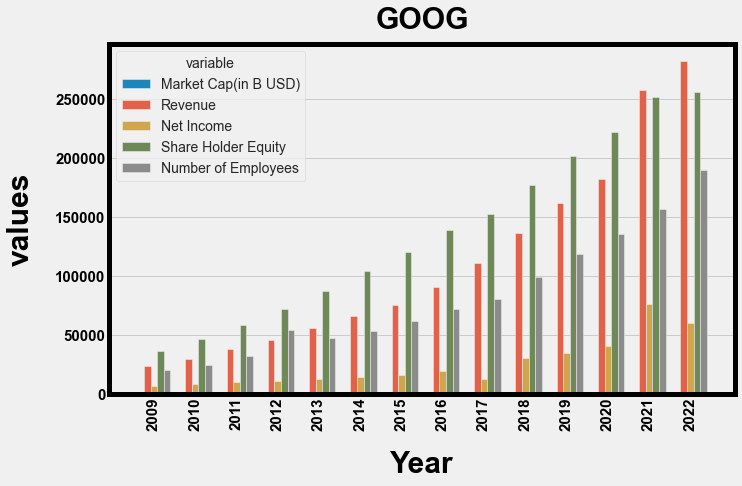

In [60]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x = 'Year', y = 'values', hue = 'variable', data = go)
plt.xlabel('Year', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.ylabel('values', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('GOOG', fontweight = 'bold', fontsize = 30, color = 'black', pad = 15)
plt.savefig('GOOG.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [61]:
# GOOG has been growing since 2009-2022. The factors responsible for this were Revenue generated, 
# Share Holder Equity and increase in Number of Employees.

In [62]:
AIG = data[data['Company '] == 'AIG']

In [63]:
AIG.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
52,2022,AIG,Bank,46.99,56437.0,20762.0,10247.0,13.01,20640.0,42235.0,...,1.0,0.6435,27.0084,2.1411,16.2446,18.1565,-1.9207,26.6982,26200,8.0028
53,2021,AIG,Bank,47.21,52057.0,15322.0,9359.0,10.82,15382.0,68912.0,...,1.0,0.4377,14.5016,1.6646,10.0157,17.9784,6.0658,14.3995,36600,4.6979
54,2020,AIG,Bank,32.62,43736.0,6912.0,-5973.0,-6.88,6821.0,67199.0,...,1.0,0.5586,-8.7433,-0.9946,-5.5694,-13.6569,3.2256,-8.6802,45000,1.2336
55,2019,AIG,Bank,44.65,49746.0,11975.0,3326.0,3.74,11817.0,67427.0,...,1.0,0.5243,6.1561,0.7849,4.0097,6.6860,-1.5986,6.1118,46000,1.8122
56,2018,AIG,Bank,34.86,47389.0,6921.0,-6.0,-0.01,6897.0,57309.0,...,1.0,0.6027,0.1797,0.0209,0.1121,-0.0127,7.9685,0.1797,49600,2.4426


In [64]:
aig = AIG.drop(['Company ', 'Category', 'Gross Profit', 'Earning Per Share', 'EBITDA', 'Current Ratio',
           'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin', 'Free Cash Flow per Share',
           'Return on Tangible Equity', 'Inflation Rate(in US)', 'Cash Flow from Operating', 
           'Cash Flow from Investing', 'Cash Flow from Financial Activities'], axis = 1)

In [65]:
aig

,Year,Market Cap(in B USD),Revenue,Net Income,Share Holder Equity,Number of Employees
52,2022,46.99,56437.0,10247.0,42235.0,26200
53,2021,47.21,52057.0,9359.0,68912.0,36600
54,2020,32.62,43736.0,-5973.0,67199.0,45000
55,2019,44.65,49746.0,3326.0,67427.0,46000
56,2018,34.86,47389.0,-6.0,57309.0,49600
57,2017,53.56,49520.0,-6084.0,65708.0,49800
58,2016,67.08,52367.0,-849.0,76858.0,56400
59,2015,76.66,58327.0,2196.0,90210.0,66400
60,2014,78.41,64406.0,7529.0,107272.0,65000
61,2013,75.16,68874.0,9085.0,101081.0,64000


In [66]:
ag = pd.melt(aig, id_vars = 'Year', value_vars = ['Market Cap(in B USD)', 'Revenue', 'Net Income', 'Share Holder Equity', 
                                                   'Number of Employees'], value_name = 'values')

In [67]:
ag

,Year,variable,values
0,2022,Market Cap(in B USD),46.99
1,2021,Market Cap(in B USD),47.21
2,2020,Market Cap(in B USD),32.62
3,2019,Market Cap(in B USD),44.65
4,2018,Market Cap(in B USD),34.86
...,...,...,...
65,2013,Number of Employees,64000.00
66,2012,Number of Employees,63000.00
67,2011,Number of Employees,57000.00
68,2010,Number of Employees,63000.00


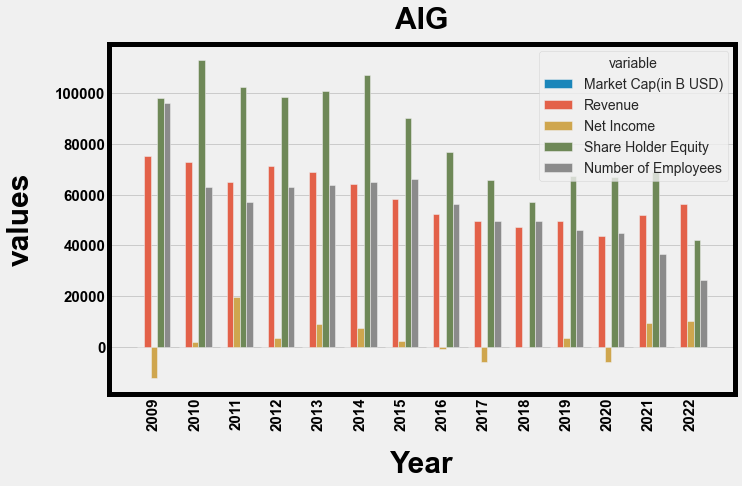

In [68]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x = 'Year', y = 'values', hue = 'variable', data = ag)
plt.xlabel('Year', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.ylabel('values', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('AIG', fontweight = 'bold', fontsize = 30, color = 'black', pad = 15)
plt.savefig('AIG.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [69]:
# AIG has been declining in growth since 2015-2022. The factors responsible for the bankruptcy
# were low Market Cap, Revenue generated, Net Income, Share Holder Equity and decrease in Number of
# Employees.

In [70]:
PCG = data[data['Company '] == 'PCG']

In [71]:
PCG.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
66,2022,PCG,Manufacturing,41.28,21680.0,16824.0,1800.0,0.84,5693.0,23075.0,...,0.8117,2.2563,7.8613,1.5289,2.5615,8.3026,-0.0160,7.8613,26010,8.0028
67,2021,PCG,Manufacturing,32.20,20642.0,16261.0,-102.0,-0.05,5286.0,21223.0,...,0.6356,2.1152,-0.4146,-0.0852,-0.1480,-0.4941,18.6025,-0.4146,26000,4.6979
68,2020,PCG,Manufacturing,24.10,18469.0,14571.0,-1318.0,-1.05,5223.0,21253.0,...,0.7070,1.9227,-6.1356,-1.3326,-2.2275,-7.1363,-18.5013,-6.1356,24000,1.2336
69,2019,PCG,Manufacturing,24.73,17129.0,13300.0,-7656.0,-14.50,-6860.0,5388.0,...,1.3321,0.0000,-141.8337,-8.9699,-141.8337,-44.6961,0.5729,-141.8337,23000,1.8122
70,2018,PCG,Manufacturing,5.75,16759.0,12260.0,-6851.0,-13.25,-6664.0,12903.0,...,0.2205,1.7046,-52.9877,-8.8798,-52.9877,-40.8795,-4.0631,-52.9877,24000,2.4426


In [72]:
pcg = PCG.drop(['Company ', 'Category', 'Gross Profit', 'Earning Per Share', 'EBITDA', 'Current Ratio',
           'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin', 'Free Cash Flow per Share',
           'Return on Tangible Equity', 'Inflation Rate(in US)', 'Cash Flow from Operating', 
           'Cash Flow from Investing', 'Cash Flow from Financial Activities'], axis = 1)

In [73]:
pcg

,Year,Market Cap(in B USD),Revenue,Net Income,Share Holder Equity,Number of Employees
66,2022,41.28,21680.0,1800.0,23075.0,26010
67,2021,32.20,20642.0,-102.0,21223.0,26000
68,2020,24.10,18469.0,-1318.0,21253.0,24000
69,2019,24.73,17129.0,-7656.0,5388.0,23000
70,2018,5.75,16759.0,-6851.0,12903.0,24000
71,2017,12.32,17135.0,1646.0,19472.0,23000
72,2016,23.06,17666.0,1393.0,18192.0,24000
73,2015,30.73,16833.0,874.0,16828.0,23000
74,2014,26.09,17090.0,1436.0,16000.0,22581
75,2013,25.29,15598.0,814.0,14594.0,21166


In [74]:
pc = pd.melt(pcg, id_vars = 'Year', value_vars = ['Market Cap(in B USD)', 'Revenue', 'Net Income', 'Share Holder Equity', 
                                                   'Number of Employees'], value_name = 'values')

In [75]:
pc

,Year,variable,values
0,2022,Market Cap(in B USD),41.28
1,2021,Market Cap(in B USD),32.20
2,2020,Market Cap(in B USD),24.10
3,2019,Market Cap(in B USD),24.73
4,2018,Market Cap(in B USD),5.75
...,...,...,...
65,2013,Number of Employees,21166.00
66,2012,Number of Employees,20593.00
67,2011,Number of Employees,19274.00
68,2010,Number of Employees,19424.00


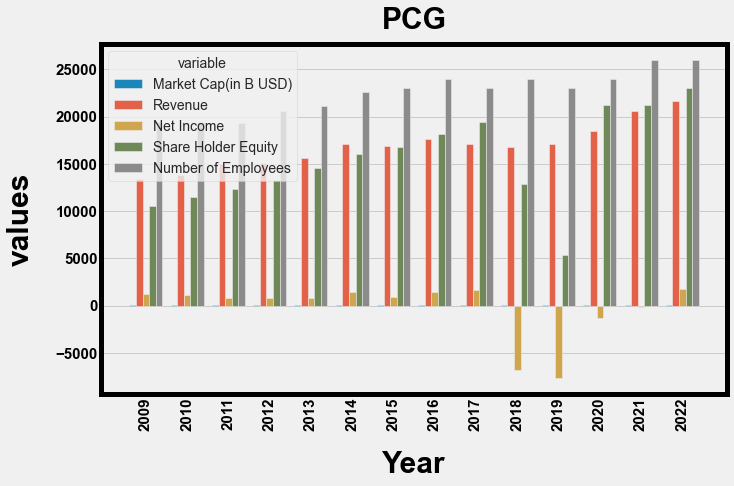

In [76]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x = 'Year', y = 'values', hue = 'variable', data = pc)
plt.xlabel('Year', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.ylabel('values', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('PCG', fontweight = 'bold', fontsize = 30, color = 'black', pad = 15)
plt.savefig('PCG.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [77]:
# Despite the drop in Net Income in 2018-2021, PCG still performed through factors like Market Cap,
# Revenue generated, Share Holder Equity and increase in Number of Employees.

In [78]:
MCD = data[data['Company '] == 'MCD']

In [79]:
MCD.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
90,2022,MCD,FOOD,186.39,23182.6,13207.200,6177.4,8.33,11241.6,-6003.4,...,1.4266,-5.9805,-102.8983,12.2481,20.6601,26.6467,-2.1323,-69.3794,150000,8.0028
91,2021,MCD,FOOD,193.02,23222.9,12580.200,7545.2,10.04,12224.1,-4601.0,...,1.7782,-7.7424,-163.9903,14.0104,24.3223,32.4903,3.3857,-102.1900,200000,4.6979
92,2020,MCD,FOOD,200.31,19207.8,9752.101,4730.5,6.31,9075.4,-7824.9,...,1.0100,-4.7848,-60.4545,8.9888,17.2823,24.6280,-1.4852,-44.6358,200000,1.2336
93,2019,MCD,FOOD,159.89,21364.4,11179.400,6025.4,7.88,10687.7,-8210.3,...,0.9826,-4.1627,-73.3883,12.6822,23.2571,28.2030,2.1046,-55.3414,205000,1.8122
94,2018,MCD,FOOD,148.82,21257.9,10832.600,5924.3,7.54,10304.6,-6258.4,...,1.3631,-4.9654,-94.6616,18.0557,23.8720,27.8687,0.8436,-68.9682,210000,2.4426


In [80]:
mcd = MCD.drop(['Company ', 'Category', 'Gross Profit', 'Earning Per Share', 'EBITDA', 'Current Ratio',
           'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin', 'Free Cash Flow per Share',
           'Return on Tangible Equity', 'Inflation Rate(in US)', 'Cash Flow from Operating', 
           'Cash Flow from Investing', 'Cash Flow from Financial Activities'], axis = 1)

In [81]:
mcd

,Year,Market Cap(in B USD),Revenue,Net Income,Share Holder Equity,Number of Employees
90,2022,186.39,23182.6,6177.4,-6003.4,150000
91,2021,193.02,23222.9,7545.2,-4601.0,200000
92,2020,200.31,19207.8,4730.5,-7824.9,200000
93,2019,159.89,21364.4,6025.4,-8210.3,205000
94,2018,148.82,21257.9,5924.3,-6258.4,210000
95,2017,136.89,22820.4,5192.3,-3268.0,235000
96,2016,137.21,24621.9,4686.5,-2204.3,375000
97,2015,101.08,25413.0,4529.3,7087.9,420000
98,2014,108.48,27441.3,4757.8,12853.4,420000
99,2013,91.19,28105.7,5585.9,16009.7,440000


In [82]:
mc = pd.melt(mcd, id_vars = 'Year', value_vars = ['Market Cap(in B USD)', 'Revenue', 'Net Income', 'Share Holder Equity', 
                                                   'Number of Employees'], value_name = 'values')

In [83]:
mc

,Year,variable,values
0,2022,Market Cap(in B USD),186.39
1,2021,Market Cap(in B USD),193.02
2,2020,Market Cap(in B USD),200.31
3,2019,Market Cap(in B USD),159.89
4,2018,Market Cap(in B USD),148.82
...,...,...,...
65,2013,Number of Employees,440000.00
66,2012,Number of Employees,440000.00
67,2011,Number of Employees,420000.00
68,2010,Number of Employees,400000.00


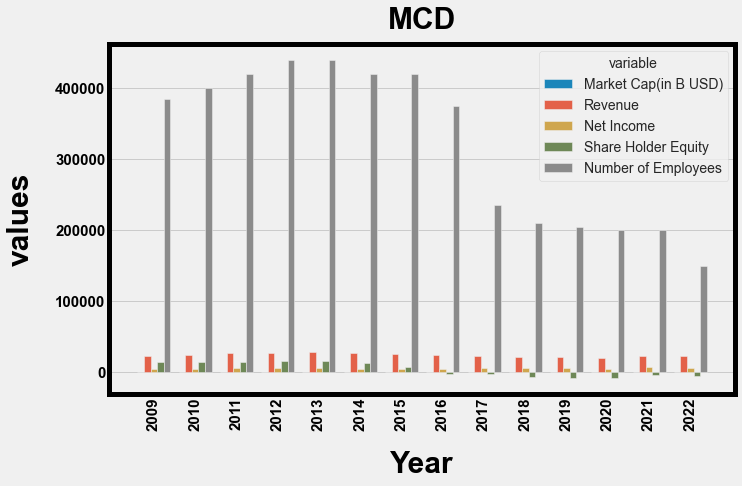

In [84]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x = 'Year', y = 'values', hue = 'variable', data = mc)
plt.xlabel('Year', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.ylabel('values', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('MCD', fontweight = 'bold', fontsize = 30, color = 'black', pad = 15)
plt.savefig('MCD.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [85]:
# MCD also experienced a decrease in growth since 2013-2022. Among the factors responsible for this were
# low Market Cap, Revenue generated, Net Income, Share Holder Equity and decrease in Number of Employees.

In [86]:
BCS = data[data['Company '] == 'BCS']

In [87]:
BCS.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
104,2022,BCS,BANK,32.53,30868.08,30868.08,6212.949,1.4744,1.0,85667.70,...,1.0,7.1602,8.6240,0.3946,1.2840,21.1620,-6.5477,9.7884,87400,8.0028
105,2021,BCS,BANK,43.60,30169.69,30169.69,8766.263,2.0131,1.0,96547.15,...,1.0,6.3396,10.2918,0.5220,1.6696,28.2167,-1.4283,11.6267,81600,4.6979
106,2020,BCS,BANK,34.66,27947.54,27947.54,1959.384,0.4416,1.0,85876.48,...,1.0,6.0327,3.6796,0.1824,0.6020,9.0147,20.4341,4.1759,83000,1.2336
107,2019,BCS,BANK,40.78,27621.90,27621.90,4180.571,0.7200,1.0,83841.26,...,1.0,5.3348,5.1081,0.2942,0.9201,16.6024,-6.2895,5.8289,80800,1.8122
108,2018,BCS,BANK,31.68,28212.33,28212.33,1860.711,0.4912,1.0,85132.21,...,1.0,5.8975,3.7191,0.2093,0.6186,7.0877,-15.5712,4.2504,83500,2.4426


In [88]:
bcs = BCS.drop(['Company ', 'Category', 'Gross Profit', 'Earning Per Share', 'EBITDA', 'Current Ratio',
           'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin', 'Free Cash Flow per Share',
           'Return on Tangible Equity', 'Inflation Rate(in US)', 'Cash Flow from Operating', 
           'Cash Flow from Investing', 'Cash Flow from Financial Activities'], axis = 1)

In [89]:
bcs

,Year,Market Cap(in B USD),Revenue,Net Income,Share Holder Equity,Number of Employees
104,2022,32.53,30868.08,6212.9490,85667.70,87400
105,2021,43.60,30169.69,8766.2630,96547.15,81600
106,2020,34.66,27947.54,1959.3840,85876.48,83000
107,2019,40.78,27621.90,4180.5710,83841.26,80800
108,2018,31.68,28212.33,1860.7110,85132.21,83500
109,2017,45.79,27162.75,-2477.0730,85081.42,79900
110,2016,46.21,29072.54,2373.1300,96720.98,119300
111,2015,53.45,38919.16,-495.3960,100706.10,129400
112,2014,60.47,41677.15,-197.7716,108705.40,132300
113,2013,55.49,43712.69,846.5568,100067.40,139600


In [90]:
bc = pd.melt(bcs, id_vars = 'Year', value_vars = ['Market Cap(in B USD)', 'Revenue', 'Net Income', 'Share Holder Equity', 
                                                   'Number of Employees'], value_name = 'values')

In [91]:
bc

,Year,variable,values
0,2022,Market Cap(in B USD),32.53
1,2021,Market Cap(in B USD),43.60
2,2020,Market Cap(in B USD),34.66
3,2019,Market Cap(in B USD),40.78
4,2018,Market Cap(in B USD),31.68
...,...,...,...
65,2013,Number of Employees,139600.00
66,2012,Number of Employees,139200.00
67,2011,Number of Employees,141100.00
68,2010,Number of Employees,147500.00


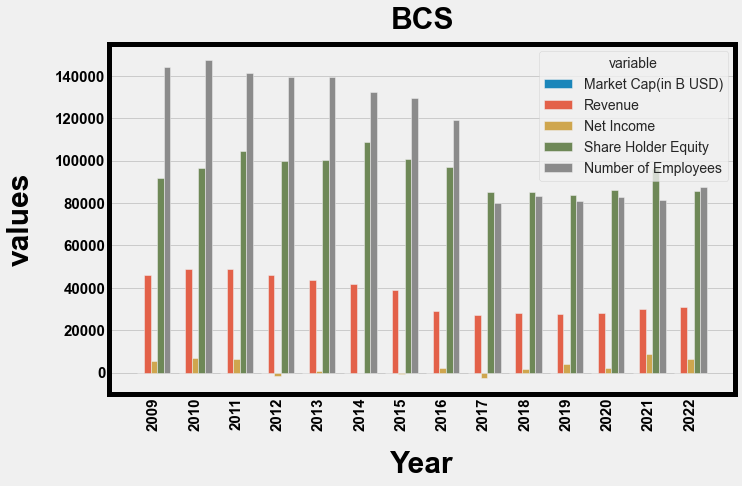

In [92]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x = 'Year', y = 'values', hue = 'variable', data = bc)
plt.xlabel('Year', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.ylabel('values', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('BCS', fontweight = 'bold', fontsize = 30, color = 'black', pad = 15)
plt.savefig('BCS.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [93]:
# BCS was another company that got liquidated due to low Market Cap, Revenue generated,
# Net Income, Share Holder Equity and decrease in Number of Employees.


In [94]:
INTC = data[data['Company '] == 'INTC']

In [95]:
INTC.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
133,2022,INTC,ELEC,109.08,63054.0,26866.0,8014.0,1.94,15369.0,103286.0,...,1.5676,0.4071,7.7619,4.4025,5.6870,12.7097,-4.5640,11.5060,131900,8.0028
134,2021,INTC,ELEC,209.45,79024.0,43815.0,19868.0,4.86,31248.0,95391.0,...,2.1323,0.3994,20.8280,11.7977,15.4134,25.1417,-2.8278,32.4864,121100,4.6979
135,2020,INTC,ELEC,104.16,77867.0,43612.0,20899.0,4.94,35917.0,81038.0,...,1.9087,0.4492,25.7891,13.6514,18.1833,26.8394,1.2739,46.4000,110600,1.2336
136,2019,INTC,ELEC,260.35,71965.0,42140.0,21048.0,4.71,32861.0,77504.0,...,1.4002,0.3742,27.1573,15.4171,20.4723,29.2476,0.7539,52.0977,110800,1.8122
137,2018,INTC,ELEC,214.19,70848.0,43737.0,21053.0,4.48,32401.0,74563.0,...,1.7314,0.3535,28.2352,16.4524,21.1246,29.7157,0.8946,55.0924,107400,2.4426


In [96]:
intc = INTC.drop(['Company ', 'Category', 'Gross Profit', 'Earning Per Share', 'EBITDA', 'Current Ratio',
           'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin', 'Free Cash Flow per Share',
           'Return on Tangible Equity', 'Inflation Rate(in US)', 'Cash Flow from Operating', 
           'Cash Flow from Investing', 'Cash Flow from Financial Activities'], axis = 1)

In [97]:
intc

,Year,Market Cap(in B USD),Revenue,Net Income,Share Holder Equity,Number of Employees
133,2022,109.08,63054.0,8014.0,103286.0,131900
134,2021,209.45,79024.0,19868.0,95391.0,121100
135,2020,104.16,77867.0,20899.0,81038.0,110600
136,2019,260.35,71965.0,21048.0,77504.0,110800
137,2018,214.19,70848.0,21053.0,74563.0,107400
138,2017,216.03,62761.0,9601.0,69019.0,102700
139,2016,171.88,59387.0,10316.0,66226.0,106000
140,2015,162.57,55355.0,11420.0,61085.0,107300
141,2014,175.46,55870.0,11704.0,55865.0,106700
142,2013,129.02,52708.0,9620.0,58256.0,107600


In [98]:
int = pd.melt(intc, id_vars = 'Year', value_vars = ['Market Cap(in B USD)', 'Revenue', 'Net Income', 'Share Holder Equity', 
                                                   'Number of Employees'], value_name = 'values')

In [99]:
int

,Year,variable,values
0,2022,Market Cap(in B USD),109.08
1,2021,Market Cap(in B USD),209.45
2,2020,Market Cap(in B USD),104.16
3,2019,Market Cap(in B USD),260.35
4,2018,Market Cap(in B USD),214.19
...,...,...,...
65,2013,Number of Employees,107600.00
66,2012,Number of Employees,105000.00
67,2011,Number of Employees,100100.00
68,2010,Number of Employees,82500.00


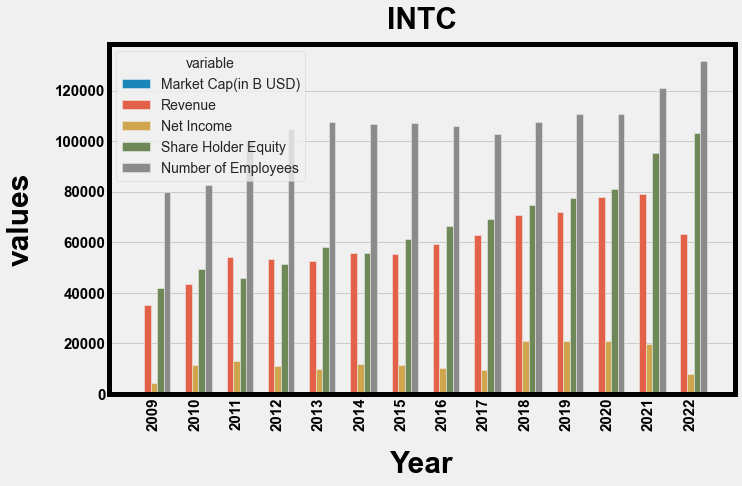

In [100]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x = 'Year', y = 'values', hue = 'variable', data = int)
plt.xlabel('Year', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.ylabel('values', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('INTC', fontweight = 'bold', fontsize = 30, color = 'black', pad = 15)
plt.savefig('INTC.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [101]:
# INTC also performed very well since 2009-2022 through some factors like Revenue generated, 
# Share Holder Equity and increase in Number of Employees.

In [102]:
AMZN = data[data['Company '] == 'AMZN']

In [103]:
AMZN.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
147,2022,AMZN,LOGI,856.94,513983.0,225152.0,-2722.0,-0.2700,54169.0,146043.0,...,0.9446,0.4598,-1.8638,-0.5883,-1.2768,-0.5296,-0.2546,-2.1645,1541000,8.0028
148,2021,AMZN,LOGI,1691.00,469822.0,197478.0,33364.0,3.2400,59312.0,138245.0,...,1.1358,0.3526,24.1340,7.9334,17.8428,7.1014,-3.9226,27.1530,1608000,4.6979
149,2020,AMZN,LOGI,1634.16,386064.0,152757.0,21331.0,2.0900,48079.0,93404.0,...,1.0502,0.3406,22.8374,6.6411,17.0348,5.5252,0.4798,27.2124,1298000,1.2336
150,2019,AMZN,LOGI,916.15,280522.0,114986.0,11588.0,1.1505,36330.0,62060.0,...,1.0970,0.3773,18.6723,5.1446,13.5573,4.1309,0.6220,24.4958,798000,1.8122
151,2018,AMZN,LOGI,734.42,232887.0,93731.0,10073.0,1.0070,27762.0,43549.0,...,1.0981,0.5395,23.1303,6.1931,15.0245,4.3253,1.0975,34.7333,647500,2.4426


In [104]:
amzn = AMZN.drop(['Company ', 'Category', 'Gross Profit', 'Earning Per Share', 'EBITDA', 'Current Ratio',
           'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin', 'Free Cash Flow per Share',
           'Return on Tangible Equity', 'Inflation Rate(in US)', 'Cash Flow from Operating', 
           'Cash Flow from Investing', 'Cash Flow from Financial Activities'], axis = 1)

In [105]:
amzn

,Year,Market Cap(in B USD),Revenue,Net Income,Share Holder Equity,Number of Employees
147,2022,856.94,513983.0,-2722.0,146043.0,1541000
148,2021,1691.00,469822.0,33364.0,138245.0,1608000
149,2020,1634.16,386064.0,21331.0,93404.0,1298000
150,2019,916.15,280522.0,11588.0,62060.0,798000
151,2018,734.42,232887.0,10073.0,43549.0,647500
152,2017,563.54,177866.0,3033.0,27709.0,566000
153,2016,356.31,135987.0,2371.0,19285.0,341400
154,2015,316.83,107006.0,596.0,13384.0,230800
155,2014,143.70,88988.0,-241.0,10741.0,154100
156,2013,182.54,74452.0,274.0,9746.0,117300


In [106]:
am = pd.melt(amzn, id_vars = 'Year', value_vars = ['Market Cap(in B USD)', 'Revenue', 'Net Income', 'Share Holder Equity', 
                                                   'Number of Employees'], value_name = 'values')

In [107]:
am

,Year,variable,values
0,2022,Market Cap(in B USD),856.94
1,2021,Market Cap(in B USD),1691.00
2,2020,Market Cap(in B USD),1634.16
3,2019,Market Cap(in B USD),916.15
4,2018,Market Cap(in B USD),734.42
...,...,...,...
65,2013,Number of Employees,117300.00
66,2012,Number of Employees,88400.00
67,2011,Number of Employees,56200.00
68,2010,Number of Employees,33700.00


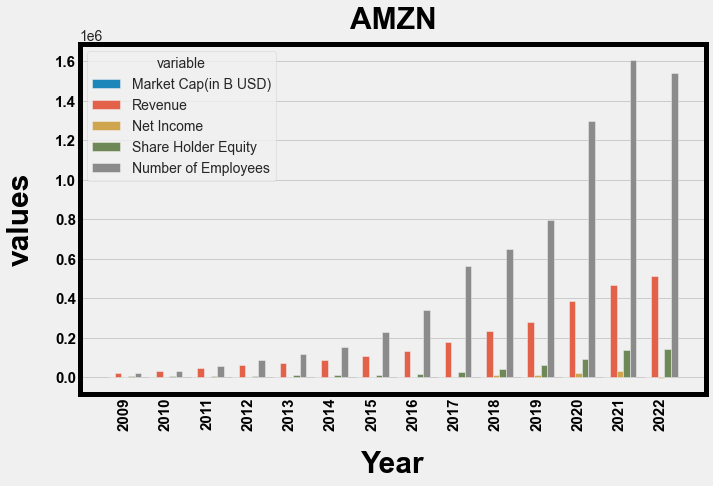

In [108]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x = 'Year', y = 'values', hue = 'variable', data = am)
plt.xlabel('Year', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.ylabel('values', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('AMZN', fontweight = 'bold', fontsize = 30, color = 'black', pad = 15)
plt.savefig('AMZN.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [109]:
# AMZN performed very well from 2009-2021. But in 2022 there was a drop 
# in growth due to low or negligible Net Income

In [110]:
SHLDQ = data[data['Company '] == 'SHLDQ']

In [111]:
SHLDQ.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
80,2018,SHLDQ,Finance,0.04,16702.0,3527.0,-383.0,-3.57,-52.0,-3723.0,...,0.7756,-1.1099,10.2874,-5.2740,25.9837,-2.2931,3.0663,7.4225,89900,2.4426
81,2017,SHLDQ,Finance,0.37,22138.0,4686.0,-2221.0,-20.78,-1610.0,-3824.0,...,1.0673,-1.0887,58.0805,-23.7236,884.8605,-10.0325,-13.9382,39.5618,140000,2.1301
82,2016,SHLDQ,Finance,1.11,25146.0,5810.0,-1129.0,-10.59,-570.0,-1956.0,...,1.1116,-1.5215,57.6687,-9.9497,-742.1052,-4.4898,14.9014,27.2859,178000,1.2616
83,2015,SHLDQ,Finance,2.19,31198.0,7149.0,-1682.0,-15.82,-889.0,-945.0,...,1.0479,-3.9958,191.5344,-13.7277,-84.5005,-5.3914,-7.4240,54.6663,196000,0.1186
84,2014,SHLDQ,Finance,3.51,36188.0,8755.0,-1365.0,-12.87,-195.0,2183.0,...,1.0946,1.9464,-51.1223,-6.1114,-22.2444,-3.7720,-2.7683,106.6922,226000,1.6222


In [112]:
shldq = SHLDQ.drop(['Company ', 'Category', 'Gross Profit', 'Earning Per Share', 'EBITDA', 'Current Ratio',
           'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin', 'Free Cash Flow per Share',
           'Return on Tangible Equity', 'Inflation Rate(in US)', 'Cash Flow from Operating', 
           'Cash Flow from Investing', 'Cash Flow from Financial Activities'], axis = 1)

In [113]:
shldq

,Year,Market Cap(in B USD),Revenue,Net Income,Share Holder Equity,Number of Employees
80,2018,0.04,16702.0,-383.0,-3723.0,89900
81,2017,0.37,22138.0,-2221.0,-3824.0,140000
82,2016,1.11,25146.0,-1129.0,-1956.0,178000
83,2015,2.19,31198.0,-1682.0,-945.0,196000
84,2014,3.51,36188.0,-1365.0,2183.0,226000
85,2013,4.90,39854.0,-930.0,3172.0,246000
86,2012,4.47,41567.0,-3140.0,4341.0,264000
87,2011,3.39,42664.0,133.0,8614.0,280000
88,2010,8.22,43360.0,235.0,9435.0,290000
89,2009,8.98,46770.0,53.0,9699.0,291000


In [114]:
sh = pd.melt(shldq, id_vars = 'Year', value_vars = ['Market Cap(in B USD)', 'Revenue', 'Net Income', 'Share Holder Equity', 
                                                   'Number of Employees'], value_name = 'values')

In [115]:
sh

,Year,variable,values
0,2018,Market Cap(in B USD),0.04
1,2017,Market Cap(in B USD),0.37
2,2016,Market Cap(in B USD),1.11
3,2015,Market Cap(in B USD),2.19
4,2014,Market Cap(in B USD),3.51
5,2013,Market Cap(in B USD),4.90
6,2012,Market Cap(in B USD),4.47
7,2011,Market Cap(in B USD),3.39
8,2010,Market Cap(in B USD),8.22
9,2009,Market Cap(in B USD),8.98


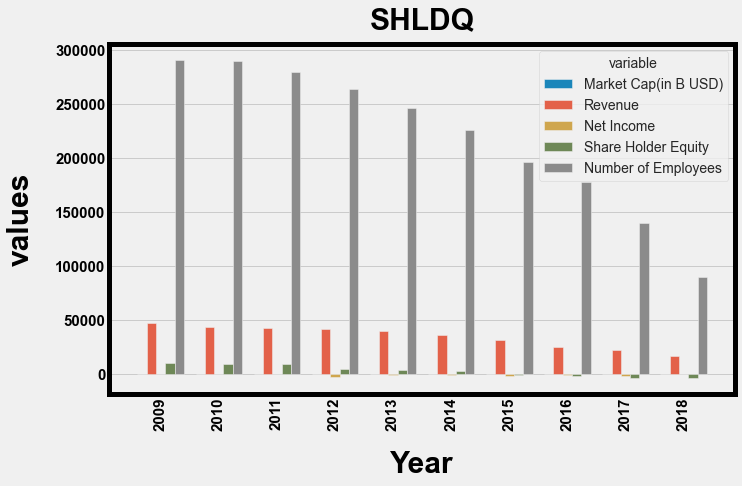

In [116]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x = 'Year', y = 'values', hue = 'variable', data = sh)
plt.xlabel('Year', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.ylabel('values', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('SHLDQ', fontweight = 'bold', fontsize = 30, color = 'black', pad = 15)
plt.savefig('SHLDQ.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [117]:
# SHLDQ has also been dropping in growth since 2011-2018. Some factors like low Market Cap,
# Revenue generated, Net Income, Share Holder Equity and a decrease in Number of Employees
# were responsible for this.

In [118]:
PYPL = data[data['Company '] == 'PYPL']

In [119]:
PYPL.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
43,2022,PYPL,FinTech,81.19,27518.0,11653.0,2419.0,2.09,5154.0,20274.0,...,1.2753,0.5138,11.9315,3.0730,7.8818,8.7906,0.2880,29.2256,29900,8.0028
44,2021,PYPL,FinTech,221.57,25371.0,11921.0,4169.0,3.52,5527.0,21727.0,...,1.2218,0.3705,19.1881,5.4998,14.0012,16.4322,-0.4843,46.6279,30900,4.6979
45,2020,PYPL,FinTech,274.41,21454.0,10001.0,4202.0,3.54,4478.0,20063.0,...,1.3264,0.4455,20.9440,5.9705,14.4887,19.5861,1.7623,42.5304,26500,1.2336
46,2019,PYPL,FinTech,127.01,17772.0,7987.0,2459.0,2.07,3631.0,16929.0,...,1.4300,0.2933,14.5254,4.7903,11.2314,13.8364,-1.0251,24.7409,23200,1.8122
47,2018,PYPL,FinTech,99.09,15451.0,7189.0,2057.0,1.71,2970.0,15386.0,...,1.2725,0.1299,13.3693,4.7471,13.3693,13.3131,2.3470,24.8520,21800,2.4426


In [120]:
pypl = PYPL.drop(['Company ', 'Category', 'Gross Profit', 'Earning Per Share', 'EBITDA', 'Current Ratio',
           'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin', 'Free Cash Flow per Share',
           'Return on Tangible Equity', 'Inflation Rate(in US)', 'Cash Flow from Operating', 
           'Cash Flow from Investing', 'Cash Flow from Financial Activities'], axis = 1)

In [121]:
pypl

,Year,Market Cap(in B USD),Revenue,Net Income,Share Holder Equity,Number of Employees
43,2022,81.19,27518.0,2419.0,20274.0,29900
44,2021,221.57,25371.0,4169.0,21727.0,30900
45,2020,274.41,21454.0,4202.0,20063.0,26500
46,2019,127.01,17772.0,2459.0,16929.0,23200
47,2018,99.09,15451.0,2057.0,15386.0,21800
48,2017,88.48,13094.0,1795.0,15994.0,18700
49,2016,47.63,10842.0,1401.0,14712.0,18100
50,2015,44.23,9248.0,1228.0,13759.0,16800
51,2014,NaN,8025.0,419.0,8248.0,15800


In [122]:
py = pd.melt(pypl, id_vars = 'Year', value_vars = ['Market Cap(in B USD)', 'Revenue', 'Net Income', 'Share Holder Equity', 
                                                   'Number of Employees'], value_name = 'values')

In [123]:
py

,Year,variable,values
0,2022,Market Cap(in B USD),81.19
1,2021,Market Cap(in B USD),221.57
2,2020,Market Cap(in B USD),274.41
3,2019,Market Cap(in B USD),127.01
4,2018,Market Cap(in B USD),99.09
5,2017,Market Cap(in B USD),88.48
6,2016,Market Cap(in B USD),47.63
7,2015,Market Cap(in B USD),44.23
8,2014,Market Cap(in B USD),NaN
9,2022,Revenue,27518.00


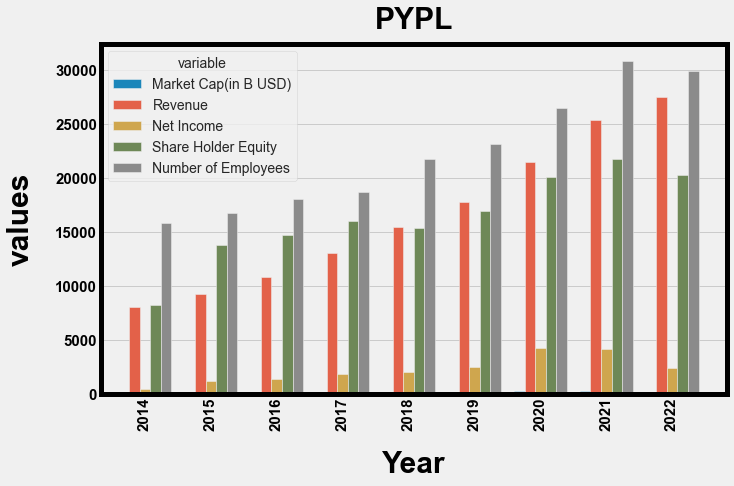

In [124]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x = 'Year', y = 'values', hue = 'variable', data = py)
plt.xlabel('Year', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.ylabel('values', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('PYPL', fontweight = 'bold', fontsize = 30, color = 'black', pad = 15)
plt.savefig('PYPL.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [125]:
# PYPL has been performing well since 2014 to 2021.The growth dropped slightly in 2022 due to some
# factors like low Market Cap,Net Income, Share Holder Equity and a decrease in Number of Employees 